# 导入全量数据

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
import cx_Oracle
conn=cx_Oracle.connect('****','****','****')
cursor_oracle=conn.cursor()

In [2]:
fangyuan_info_sql = """
select t.房屋建筑面积,t.房屋朝向,t.产品线,t.出租方式,t.产品版本,t.楼盘ID,t.楼盘名称,t.总空置天数,t.改前卧室数量,t.改后卧室数量,
s.房源编号,s.房间编号,s.大区,s.业务部,s.业务组,s.有无阳台,s.是否优化间,s.房间朝向,s.使用面积,s.改后户型,s.是否独卫,s.房价促销价,s.所在楼层,s.总楼层,s.房间状态,s.卧室类型,s.空置天数,s.首次出租,s.产品类型名称,s.上次出房价,s.最近一个月访问量,s.最近一个月约看量,t.收房到期日
from 收房合同明细_北京   t
right join "房间明细"  s
on t.收房合同号NEW = s.收房合同号
where s.城市名称 = '北京'
"""

In [3]:
cursor_oracle.execute(fangyuan_info_sql)

<cx_Oracle.Cursor on <cx_Oracle.Connection to bi_reader@10.16.26.35:1521/bidb>>

In [4]:
fangyuan_info_raw = cursor_oracle.fetchall()

In [5]:
columns = ['房屋建筑面积','房屋朝向','产品线','出租方式','产品版本','楼盘ID','楼盘名称','总空置天数','改前卧室数量','改后卧室数量','房源编号','房间编号','大区','业务部','业务组','有无阳台','是否优化间','房间朝向','使用面积','改后户型','是否独卫','房价促销价','所在楼层','总楼层','房间状态','卧室类型','空置天数','首次出租','产品类型名称','上次出房价','最近一个月访问量','最近一个月约看量','收房到期日']

In [6]:
fangyuan_info_df = pd.DataFrame(fangyuan_info_raw, columns = columns)

In [7]:
fangyuan_info_df

,房屋建筑面积,房屋朝向,产品线,出租方式,产品版本,楼盘ID,楼盘名称,总空置天数,改前卧室数量,改后卧室数量,房源编号,房间编号,大区,业务部,业务组,有无阳台,是否优化间,房间朝向,使用面积,改后户型,是否独卫,房价促销价,所在楼层,总楼层,房间状态,卧室类型,空置天数,首次出租,产品类型名称,上次出房价,最近一个月访问量,最近一个月约看量,收房到期日
0,58.90,南,自如友家,分租,友家V3.0,1111027382788,紫竹院南路14号院,160.0,2.0,2.0,PEK1600201484,02,京南战区,军博大区,首师大业务组,否,否,南,10.40,2,否,3090.0,2,12,ycz,次卧,0,非首次,友家V3.0,3090.0,0,2,2020-09-26
1,58.90,南,自如友家,分租,友家V3.0,1111027382788,紫竹院南路14号院,160.0,2.0,2.0,PEK1600201484,01,京南战区,军博大区,首师大业务组,是,否,南,16.80,2,否,3490.0,2,12,ycz,主卧,0,非首次,友家V3.0,3190.0,0,0,2020-09-26
2,85.22,南北,自如友家,分租,友家V3.0,1111027378834,前进花园石门苑,135.0,2.0,3.0,BJSY89185789,03,京北战区,顺义大区,顺义卧龙业务组,是,是,南,12.00,3,否,1830.0,2,6,ycz,优化间,0,非首次,友家V3.0,1830.0,0,0,2020-09-04
3,85.22,南北,自如友家,分租,友家V3.0,1111027378834,前进花园石门苑,135.0,2.0,3.0,BJSY89185789,01,京北战区,顺义大区,顺义卧龙业务组,否,否,南,11.50,3,否,1790.0,2,6,ycz,次卧,0,非首次,友家V3.0,1790.0,0,0,2020-09-04
4,85.22,南北,自如友家,分租,友家V3.0,1111027378834,前进花园石门苑,135.0,2.0,3.0,BJSY89185789,02,京北战区,顺义大区,顺义卧龙业务组,否,否,北,6.82,3,否,1690.0,2,6,ycz,次卧,0,非首次,友家V3.0,1590.0,0,0,2020-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418938,NaN,None,None,None,None,None,None,NaN,NaN,NaN,BJZRGZ1117104269,01,京北战区,国门大区,机场业务组,是,否,东,19.00,2,否,4330.0,1,5,zxpzz,主卧,0,首次,整租V3.1,NaN,0,0,NaT
418939,NaN,None,None,None,None,None,None,NaN,NaN,NaN,BJZRGZ1118214422,02,京西战区,知春路大区,皂君庙业务组,否,否,南,16.00,2,否,0.0,3,18,zxpzz,次卧,0,首次,整租V3.1,NaN,0,0,NaT
418940,NaN,None,None,None,None,None,None,NaN,NaN,NaN,BJZRGZ1118214422,01,京西战区,知春路大区,皂君庙业务组,是,否,南,18.00,2,否,8130.0,3,18,zxpzz,主卧,0,首次,整租V3.1,NaN,0,0,NaT
418941,NaN,None,None,None,None,None,None,NaN,NaN,NaN,BJZRGZ2120552312,02,京东战区,百子湾大区,大望业务组,否,否,北,12.46,2,否,0.0,2,10,zxpzz,None,0,首次,整租V4.0高配版,NaN,0,0,NaT


# 数据清洗

In [8]:
import numpy as np
import re

## 房屋建筑面积

这部分看整租就可以

In [9]:
fangyuan_info_df.loc[fangyuan_info_df['出租方式']=='整租']['房屋建筑面积'].describe()

count    136194.000000
mean         63.274519
std          19.690991
min          10.000000
25%          50.100000
50%          59.700000
75%          73.130000
max         329.710000
Name: 房屋建筑面积, dtype: float64

In [10]:
fangyuan_info_df.loc[(fangyuan_info_df['出租方式']=='整租') & (fangyuan_info_df['房屋建筑面积'] > 250)]

,房屋建筑面积,房屋朝向,产品线,出租方式,产品版本,楼盘ID,楼盘名称,总空置天数,改前卧室数量,改后卧室数量,房源编号,房间编号,大区,业务部,业务组,有无阳台,是否优化间,房间朝向,使用面积,改后户型,是否独卫,房价促销价,所在楼层,总楼层,房间状态,卧室类型,空置天数,首次出租,产品类型名称,上次出房价,最近一个月访问量,最近一个月约看量,收房到期日
314472,255.99,南北,自如豪宅,整租,豪宅2.0,1111027374276,富力城E区,0.0,3.0,3.0,BJZRGZ1719456554,01,自如豪宅事业部,豪宅业务部,豪宅大望路业务组,否,否,南,39.40,3,是,35000.0,5,5,ycz,主卧,0,非首次,豪宅2.0,0.0,0,0,2022-10-27
314473,255.99,南北,自如豪宅,整租,豪宅2.0,1111027374276,富力城E区,0.0,3.0,3.0,BJZRGZ1719456554,03,自如豪宅事业部,豪宅业务部,豪宅大望路业务组,否,否,北,13.60,3,否,0.0,5,5,ycz,次卧,0,非首次,豪宅2.0,0.0,0,0,2022-10-27
314474,255.99,南北,自如豪宅,整租,豪宅2.0,1111027374276,富力城E区,0.0,3.0,3.0,BJZRGZ1719456554,02,自如豪宅事业部,豪宅业务部,豪宅大望路业务组,否,否,北,14.90,3,是,0.0,5,5,ycz,次卧,0,非首次,豪宅2.0,0.0,0,0,2022-10-27
331976,288.32,南北,自如豪宅,整租,豪宅2.0,1111027381676,阳光上东,0.0,4.0,4.0,BJZRGZ1719471007,01,自如豪宅事业部,豪宅业务部,豪宅望京业务组,否,否,西,38.90,4,是,45000.0,7,9,ycz,主卧,0,非首次,豪宅2.0,0.0,0,0,2024-12-02
331977,288.32,南北,自如豪宅,整租,豪宅2.0,1111027381676,阳光上东,0.0,4.0,4.0,BJZRGZ1719471007,03,自如豪宅事业部,豪宅业务部,豪宅望京业务组,否,否,南,14.30,4,否,0.0,7,9,ycz,次卧,0,非首次,豪宅2.0,0.0,0,0,2024-12-02
331978,288.32,南北,自如豪宅,整租,豪宅2.0,1111027381676,阳光上东,0.0,4.0,4.0,BJZRGZ1719471007,05,自如豪宅事业部,豪宅业务部,豪宅望京业务组,否,否,北,15.00,4,否,0.0,7,9,ycz,次卧,0,非首次,豪宅2.0,0.0,0,0,2024-12-02
331979,288.32,南北,自如豪宅,整租,豪宅2.0,1111027381676,阳光上东,0.0,4.0,4.0,BJZRGZ1719471007,02,自如豪宅事业部,豪宅业务部,豪宅望京业务组,是,否,南,30.90,4,是,0.0,7,9,ycz,次卧,0,非首次,豪宅2.0,0.0,0,0,2024-12-02
347450,256.35,南北,自如豪宅,整租,豪宅2.0,1111027375466,华远九都汇,0.0,4.0,4.0,BJZRGZ1719489676,03,自如豪宅事业部,豪宅业务部,豪宅望京业务组,否,否,北,14.80,4,否,0.0,4,23,ycz,次卧,0,非首次,豪宅2.0,31500.0,0,0,2026-01-28
347451,256.35,南北,自如豪宅,整租,豪宅2.0,1111027375466,华远九都汇,0.0,4.0,4.0,BJZRGZ1719489676,05,自如豪宅事业部,豪宅业务部,豪宅望京业务组,否,否,北,8.60,4,是,0.0,4,23,ycz,次卧,0,非首次,豪宅2.0,31500.0,0,0,2026-01-28
347452,256.35,南北,自如豪宅,整租,豪宅2.0,1111027375466,华远九都汇,0.0,4.0,4.0,BJZRGZ1719489676,02,自如豪宅事业部,豪宅业务部,豪宅望京业务组,是,否,南,15.40,4,是,0.0,4,23,ycz,次卧,0,非首次,豪宅2.0,31500.0,0,0,2026-01-28


## 房屋朝向

朝向修正函数

In [11]:
def towards_modify(toward):
    if toward not in ['东','南','西','北','东南','东北','西南','西北']:
        return '东'
    else:
        return toward

In [12]:
fangyuan_info_df['房屋朝向'] = fangyuan_info_df['房屋朝向'].apply(lambda x:towards_modify(x))

In [13]:
fangyuan_info_df['房间朝向'] = fangyuan_info_df['房间朝向'].apply(lambda x:towards_modify(x))

## 产品线

In [14]:
fangyuan_info_df['产品线'].unique()

array(['自如友家', '自如整租', '业主直租', '自如精选', '自如豪宅', 'PGA公寓', None],
      dtype=object)

In [15]:
fangyuan_info_df = fangyuan_info_df.loc[fangyuan_info_df.notnull()['产品线']]

## 出租方式

In [16]:
fangyuan_info_df['出租方式'].unique()

array(['分租', '整租'], dtype=object)

## 产品版本

In [17]:
fangyuan_info_df['产品版本'].unique()

array(['友家V3.0', '整租V1.3', '友家V2.0', '友家V1.0', '整租V1.2', '友家V4.0',
       '整租V1.0', '整租V2.0', '整租V3.1', '整租V3.0', '业主直租', '整租V1.1', '友家V5.0',
       '自如精选1.0', '自如豪宅', '业主直租V2.0', '友家6.0-ZHOME', '豪宅2.0', '整租V4.0高配版',
       '友家6.0', '整租V4.0低配版', '整租V3.2', 'PGA公寓', '豪宅3.0', '友家套房'],
      dtype=object)

In [18]:
fangyuan_info_df = fangyuan_info_df.loc[(fangyuan_info_df['产品版本'] !='PGA公寓') & (fangyuan_info_df['产品版本'] !='友家套房')]

## 改前改后卧室数量-->户型

In [19]:
fangyuan_info_df['改前卧室数量'].unique()

array([ 3.,  2.,  1.,  4.,  5.,  6.,  7., nan,  0.,  8.])

In [20]:
fangyuan_info_df['改后卧室数量'].unique()

array([3., 2., 1., 4., 5., 6., 7., 8.])

In [21]:
fangyuan_info_df = fangyuan_info_df.loc[fangyuan_info_df['改前卧室数量'] != 0]

In [22]:
def get_type(before, after):
    if after == 1:
        return '11'
    elif after <= 4:
        if before == after:
            return str(int(before))+str(int(after))
        else:
            return str(int(after)-1) + str(int(after))
    else:
        return '45'

In [23]:
fangyuan_info_df

,房屋建筑面积,房屋朝向,产品线,出租方式,产品版本,楼盘ID,楼盘名称,总空置天数,改前卧室数量,改后卧室数量,房源编号,房间编号,大区,业务部,业务组,有无阳台,是否优化间,房间朝向,使用面积,改后户型,是否独卫,房价促销价,所在楼层,总楼层,房间状态,卧室类型,空置天数,首次出租,产品类型名称,上次出房价,最近一个月访问量,最近一个月约看量,收房到期日
0,63.20,南,自如友家,分租,友家V3.0,1111027379192,水碓子东里,135.0,3.0,3.0,BJZRCY91426124,02,京东战区,国贸大区,甜水园业务组,否,否,北,6.5,3,否,2660.0,8,13,ycz,次卧,0,非首次,友家V3.0,2430.0,0,0,2020-10-21
1,63.20,南,自如友家,分租,友家V3.0,1111027379192,水碓子东里,135.0,3.0,3.0,BJZRCY91426124,01,京东战区,国贸大区,甜水园业务组,是,否,东,16.0,3,否,3290.0,8,13,ycz,主卧,0,非首次,友家V3.0,3190.0,0,0,2020-10-21
2,63.20,南,自如友家,分租,友家V3.0,1111027379192,水碓子东里,135.0,3.0,3.0,BJZRCY91426124,03,京东战区,国贸大区,甜水园业务组,否,否,北,7.0,3,否,2460.0,8,13,ycz,次卧,0,非首次,友家V3.0,2460.0,0,0,2020-10-21
3,82.24,东,自如友家,分租,友家V3.0,1111027378235,龙泽苑西区,135.0,2.0,2.0,BJZRCP52794993,01,京西战区,回龙观西大区,龙泽业务组,否,否,南,13.8,2,否,3230.0,3,6,ycz,主卧,0,非首次,友家V3.0,3230.0,0,0,2020-09-14
4,82.24,东,自如友家,分租,友家V3.0,1111027378235,龙泽苑西区,135.0,2.0,2.0,BJZRCP52794993,02,京西战区,回龙观西大区,龙泽业务组,是,否,北,10.5,2,否,2430.0,3,6,ycz,次卧,0,非首次,友家V3.0,2430.0,0,0,2020-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421627,210.00,西南,自如豪宅,整租,豪宅2.0,1111027374275,富力城D区,0.0,4.0,4.0,BJZRGZ1720550973,01,自如豪宅事业部,豪宅业务部,豪宅大望路业务组,否,否,南,20.0,4,否,32000.0,1,16,zxpzz,主卧,16,首次,豪宅2.0,NaN,0,0,2026-05-26
421628,71.20,东,自如友家,分租,友家V4.0,1111027378567,南木樨园,60.0,3.0,3.0,BJZRGY0818237287,03,京南战区,东南大区,木樨园业务组,否,否,北,8.2,3,否,2130.0,3,5,dzz,次卧,13,非首次,友家V4.0,2260.0,0,0,2023-10-10
421629,71.20,东,自如友家,分租,友家V4.0,1111027378567,南木樨园,60.0,3.0,3.0,BJZRGY0818237287,01,京南战区,东南大区,木樨园业务组,是,否,南,15.2,3,否,2690.0,3,5,ycz,主卧,0,非首次,友家V4.0,2790.0,0,1,2023-10-10
421630,71.20,东,自如友家,分租,友家V4.0,1111027378567,南木樨园,60.0,3.0,3.0,BJZRGY0818237287,02,京南战区,东南大区,木樨园业务组,否,否,南,11.5,3,否,2490.0,3,5,dzz,次卧,6,非首次,友家V4.0,2490.0,0,0,2023-10-10


In [24]:
fangyuan_info_df['户型'] = fangyuan_info_df.apply(lambda x:get_type(x['改前卧室数量'], x['改后卧室数量']),axis=1)

## 有无阳台

In [25]:
fangyuan_info_df['有无阳台'].unique()

array(['否', '是'], dtype=object)

是--> 1;否-->0.

In [26]:
def get_balcony(char):
    if char == '是':
        return 1
    else:
        return 0

In [27]:
fangyuan_info_df['balcony'] = fangyuan_info_df['有无阳台'].apply(lambda x:get_balcony(x))

## 是否优化间

In [28]:
fangyuan_info_df['是否优化间'].unique()

array(['否', '是'], dtype=object)

In [29]:
def get_opt(char):
    if char == '是':
        return 1
    else:
        return 0

In [30]:
fangyuan_info_df['opt'] = fangyuan_info_df['是否优化间'].apply(lambda x:get_opt(x))

## 使用面积

In [31]:
fangyuan_info_df =  fangyuan_info_df.loc[(fangyuan_info_df['使用面积']<50) & (fangyuan_info_df['使用面积']> 5)]

## 是否独卫

In [32]:
fangyuan_info_df['是否独卫'].unique()

array(['否', '是'], dtype=object)

In [33]:
def get_bathroom(char):
    if char == '是':
        return 1
    else:
        return 0

In [34]:
fangyuan_info_df['bathroom'] = fangyuan_info_df['是否独卫'].apply(lambda x:get_bathroom(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 所在楼层

In [13]:
fangyuan_info_df['所在楼层'].unique()

array(['2', '4', '23', '6', '3', '14', '19', '1', '11', '12A', '24', '5',
       '10', '22', '13', '12', '8', '18', '21', '20', '17', '16', '25',
       '9', '7', '26', '15', '32', '27', '12B', '29', '0', '31', '28',
       '2层', '-1', '3层', '30', '3A', '13B', '3B', '33', 'B', '34', '35',
       '5B', '3F', '37', '08', '新楼层', 'G', '23A', '商5', '36', '15A', '2A',
       '22B', '3G', '14A', 'l12', '06', '03', '40', '11层', '5A', 'l3',
       '25A', '22A', '13F', '6楼层', '38', 'A', 'F1层', '13A', 'B1', 'S1',
       '63', '15B', '43', '12层', '15E', 'l2', '14E', '5楼层', '01', '1楼层',
       'l11', '12（A）', '底墒1', 'l10', '07', '9A', '22a', '单元2', 'l5', '05',
       '39', '18A', 'C', '1101', '602', '12C', '5层', '1016', '单元4'],
      dtype=object)

In [35]:
# test
''.join(re.findall(r'\d+', '-1B201,01'))

'120101'

正则获取楼层号：int类型

In [36]:
def get_floor(char):
    num_list = re.findall(r'\d+', char)
    if num_list != []:
        return ''.join(num_list)
    else:
        return '楼层填写错误'

In [37]:
fangyuan_info_df['floor'] = fangyuan_info_df['所在楼层'].apply(lambda x:get_floor(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
fangyuan_info_df = fangyuan_info_df.loc[fangyuan_info_df.notnull()['总楼层']]

In [39]:
fangyuan_info_df['总楼层'] = fangyuan_info_df['总楼层'].apply(lambda x:str(x))

顶层or一层

In [40]:
def get_louceng(x, y):
    if x == y or y =='1':
        return 1
    else:
        return 0

In [41]:
fangyuan_info_df['顶层/一层'] = fangyuan_info_df.apply(lambda x:get_louceng(x['总楼层'],x['floor']), axis=1)

## 卧室类型

In [42]:
fangyuan_info_df['卧室类型'].unique()

array(['次卧', '主卧', '优化间', '书卧', None, '无'], dtype=object)

In [43]:
fangyuan_info_df.loc[fangyuan_info_df['卧室类型']=='无']

,房屋建筑面积,房屋朝向,产品线,出租方式,产品版本,楼盘ID,楼盘名称,总空置天数,改前卧室数量,改后卧室数量,房源编号,房间编号,大区,业务部,业务组,有无阳台,是否优化间,房间朝向,使用面积,改后户型,是否独卫,房价促销价,所在楼层,总楼层,房间状态,卧室类型,空置天数,首次出租,产品类型名称,上次出房价,最近一个月访问量,最近一个月约看量,收房到期日,户型,balcony,opt,bathroom,floor,顶层/一层
137132,43.00,南,自如整租,整租,整租V3.1,1111045342092,北京像素南区,45.0,1.0,1.0,BJZRCY59406982,01,京东战区,常营大区,像素业务组,否,否,南,12.00,1,否,4690.0,9,23,ycz,无,0,非首次,整租V1.3,4730.0,0,0,2020-10-30,11,0,0,0,9,0
139138,64.11,南,自如整租,整租,整租V3.1,1111046529355,青塔中街44号院,45.0,1.0,1.0,BJZRFT29599399,01,京西战区,五棵松大区,莲玉业务组,是,否,南,13.00,1,否,4830.0,1,24,ycz,无,0,非首次,整租V1.3,3530.0,0,0,2020-10-20,11,1,0,0,1,1
139150,89.13,东,自如整租,整租,整租V1.2,1111046529355,青塔中街44号院,45.0,2.0,2.0,BJZRFT99549075,01,京西战区,五棵松大区,莲玉业务组,否,否,南,21.00,2,否,3058.0,1,24,ycz,无,0,非首次,友家V3.0,5390.0,0,0,2020-10-20,22,0,0,0,1,1
139151,89.13,东,自如整租,整租,整租V1.2,1111046529355,青塔中街44号院,45.0,2.0,2.0,BJZRFT99549075,02,京西战区,五棵松大区,莲玉业务组,否,否,北,15.20,2,否,2502.0,1,24,ycz,无,0,非首次,友家V3.0,5390.0,0,0,2020-10-20,22,0,0,0,1,1
200485,40.32,北,自如整租,整租,整租V3.1,1111047377071,东亚创展国际,71.0,1.0,1.0,BJZRSY21177407,01,京北战区,国门大区,后沙峪业务组,否,否,北,12.80,1,否,3590.0,9,13,ycz,无,0,非首次,整租V1.3,3490.0,0,0,2022-01-12,11,0,0,0,9,0
267661,36.64,西,自如整租,整租,整租V3.1,1111027376768,大成国际,60.0,1.0,1.0,BJZRCY51787492,01,京东战区,百子湾大区,大成业务组,否,否,西,7.00,1,否,5190.0,21,25,ycz,无,0,非首次,整租V2.0,5590.0,0,0,2022-05-30,11,0,0,0,21,0
268018,42.37,东,自如整租,整租,整租V3.1,1111027375154,华龙苑中里,55.0,2.0,2.0,BJZRCP19075910,02,京西战区,回龙观西大区,龙旗业务组,否,否,北,8.80,2,否,2292.0,5,6,ycz,无,0,非首次,整租V2.0,5190.0,0,0,2022-09-30,22,0,0,0,5,0
268019,42.37,东,自如整租,整租,整租V3.1,1111027375154,华龙苑中里,55.0,2.0,2.0,BJZRCP19075910,01,京西战区,回龙观西大区,龙旗业务组,否,否,南,8.00,2,否,3298.0,5,6,ycz,无,0,非首次,整租V2.0,5190.0,0,0,2022-09-30,22,0,0,0,5,0
284936,47.04,北,自如整租,整租,整租V3.1,1111027380385,万年花城二期,45.0,1.0,1.0,BJZRGZ1518183356,01,京南战区,首经贸大区,花城街业务组,否,否,北,7.70,1,否,5530.0,15,27,ycz,无,0,非首次,自如精选1.0,5490.0,0,0,2021-05-11,11,0,0,0,15,0
293238,43.00,南,自如整租,整租,整租V3.1,1111027382103,永泰西里,45.0,1.0,1.0,BJZRHD82819852,01,京西战区,西三旗大区,永泰业务组,是,否,南,15.70,1,否,5860.0,3,6,ycz,无,0,非首次,整租V2.0,5690.0,0,0,2021-06-12,11,1,0,0,3,0


In [44]:
fangyuan_info_df.loc[fangyuan_info_df.isnull()['卧室类型']]

,房屋建筑面积,房屋朝向,产品线,出租方式,产品版本,楼盘ID,楼盘名称,总空置天数,改前卧室数量,改后卧室数量,房源编号,房间编号,大区,业务部,业务组,有无阳台,是否优化间,房间朝向,使用面积,改后户型,是否独卫,房价促销价,所在楼层,总楼层,房间状态,卧室类型,空置天数,首次出租,产品类型名称,上次出房价,最近一个月访问量,最近一个月约看量,收房到期日,户型,balcony,opt,bathroom,floor,顶层/一层
13325,27.63,北,自如整租,整租,整租V2.0,1111027378998,荣丰2008,137.0,1.0,1.0,BJZRXC73604260,01,京南战区,广安门大区,荣丰业务组,是,否,北,14.1,1,否,5290.0,17,20,ycz,None,0,非首次,整租V2.0,4930.0,0,0,2021-11-11,11,1,0,0,17,0
55114,64.00,南,自如整租,整租,整租V3.1,1111027375167,惠民家园,80.0,2.0,2.0,BJZRGZ111779626,02,京西战区,石景山大区,泷悦业务组,否,否,南,6.2,2,否,0.0,5,21,ycz,None,0,非首次,整租V3.1,3390.0,0,0,2020-08-13,22,0,0,0,5,0
112717,93.00,北,自如友家,分租,友家V4.0,1111027376456,仓夹道,40.0,4.0,4.0,BJDC84589736,02,京北战区,工体大区,东直门业务组,否,否,西南,14.5,4,否,3090.0,22,22,ycz,None,0,非首次,友家V1.0,3390.0,0,0,2020-11-04,44,0,0,0,22,1
157473,73.80,东,自如友家,分租,友家V4.0,1111027378253,牡丹园东里,60.0,2.0,2.0,BJZRHD80481202,02,京北战区,牡丹园大区,龙翔路业务组,否,否,北,8.6,2,否,3260.0,9,12,ycz,None,0,非首次,友家V3.0,3090.0,0,0,2021-10-04,22,0,0,0,9,0
158599,138.75,东,自如友家,分租,友家V4.0,1111027380955,绣江南,100.0,3.0,4.0,BJZRGY0818206818,01,京东战区,通城大区,万盛业务组,否,否,北,14.8,4,否,1590.0,6,6,ycz,None,0,非首次,友家V4.0,1390.0,0,0,2021-10-23,34,0,0,0,6,1
161595,99.50,东,自如友家,分租,友家V4.0,1111027374793,高原街7号院,60.0,2.0,3.0,BJCY84637125,03,京北战区,直收大屯大区,直收惠新业务组,是,否,东,13.2,3,否,2890.0,3,24,ycz,None,0,非首次,友家V1.0,2690.0,0,0,2022-01-11,23,1,0,0,3,0
208016,76.00,西,自如友家,分租,友家V4.0,1111027379988,糖人街,110.0,2.0,3.0,BJZRGY0818269681,02,京南战区,六里桥大区,首科业务组,否,否,南,8.5,3,否,2890.0,19,20,ycz,None,0,非首次,友家V4.0,2890.0,0,0,2022-11-22,23,0,0,0,19,0
208017,76.00,西,自如友家,分租,友家V4.0,1111027379988,糖人街,110.0,2.0,3.0,BJZRGY0818269681,01,京南战区,六里桥大区,首科业务组,否,否,南,9.0,3,否,2590.0,19,20,ycz,None,0,非首次,友家V4.0,2560.0,0,0,2022-11-22,23,0,0,0,19,0
210353,65.00,北,自如整租,整租,整租V3.1,1111027376495,朝内大街136号院,110.0,2.0,2.0,BJZRGZ1118269202,02,京东战区,朝阳门大区,朝阳门业务组,否,否,北,9.0,2,否,0.0,3,15,ycz,None,0,非首次,整租V3.1,8660.0,0,0,2021-11-12,22,0,0,0,3,0
210354,65.00,北,自如整租,整租,整租V3.1,1111027376495,朝内大街136号院,110.0,2.0,2.0,BJZRGZ1118269202,01,京东战区,朝阳门大区,朝阳门业务组,是,否,北,15.2,2,否,8230.0,3,15,ycz,None,0,非首次,整租V3.1,8660.0,0,0,2021-11-12,22,1,0,0,3,0


## 结果

In [45]:
fangyuan_zhengzu = fangyuan_info_df.loc[fangyuan_info_df['出租方式']=='整租',['楼盘ID','楼盘名称','产品版本','房屋建筑面积','房屋朝向','房源编号','房间编号','户型','卧室类型','使用面积','房间朝向','opt','balcony','bathroom','首次出租','空置天数','总楼层','floor','房价促销价','最近一个月访问量','最近一个月约看量','顶层/一层','收房到期日']]

In [46]:
fangyuan_fenzu = fangyuan_info_df.loc[fangyuan_info_df['出租方式']=='分租',['楼盘ID','楼盘名称','产品版本','房屋建筑面积','房源编号','房间编号','户型','卧室类型','使用面积','房间朝向','opt','balcony','bathroom','首次出租','空置天数','总楼层','floor','房价促销价','最近一个月访问量','最近一个月约看量','顶层/一层','收房到期日']]

In [47]:
fangyuan_fenzu = fangyuan_fenzu.loc[fangyuan_fenzu['户型']!='11']

## 友家去重

In [48]:
fangyuan_fenzu_gb_fangyuanhao = fangyuan_fenzu.groupby(['房源编号','房间编号']).count().sort_values('楼盘ID', ascending=False).reset_index().iloc[:,0:3]

In [49]:
fangyuan_fenzu_duplicate_list = fangyuan_fenzu_gb_fangyuanhao.loc[fangyuan_fenzu_gb_fangyuanhao['楼盘ID']>1]['房源编号'].unique()

In [50]:
fangyuan_fenzu_duplicate_list

array([], dtype=object)

In [51]:
fangyuan_fenzu = fangyuan_fenzu.loc[~fangyuan_fenzu['房源编号'].isin(fangyuan_fenzu_duplicate_list)]

# 读入因子表

In [52]:
import os
os.getcwd()

'D:\\自如工作的日子\\工作代码\\Python'

In [53]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [54]:
youjia_factors_without_area = pd.read_excel(".\\星链计划\\factor.xlsx",
                                            sheet_name="友家因子表_不含面积")
youjia_area_factors = pd.read_excel(".\\星链计划\\factor.xlsx",
                                    sheet_name="友家面积因子表")
zhengzu_factors_without_area = pd.read_excel(".\\星链计划\\factor.xlsx",
                                             sheet_name="整租因子表")
zhengzu_1_area_factors = pd.read_excel(".\\星链计划\\factor.xlsx",
                                     sheet_name="整一面积因子表")
zhengzu_2_area_factors = pd.read_excel(".\\星链计划\\factor.xlsx",
                                     sheet_name="整二面积因子表")

# 业务填表检查

In [55]:
fangyuan_fenzu

,楼盘ID,楼盘名称,产品版本,房屋建筑面积,房源编号,房间编号,户型,卧室类型,使用面积,房间朝向,opt,balcony,bathroom,首次出租,空置天数,总楼层,floor,房价促销价,最近一个月访问量,最近一个月约看量,顶层/一层,收房到期日
0,1111027379192,水碓子东里,友家V3.0,63.20,BJZRCY91426124,02,33,次卧,6.5,北,0,0,0,非首次,0,13,8,2660.0,0,0,0,2020-10-21
1,1111027379192,水碓子东里,友家V3.0,63.20,BJZRCY91426124,01,33,主卧,16.0,东,0,1,0,非首次,0,13,8,3290.0,0,0,0,2020-10-21
2,1111027379192,水碓子东里,友家V3.0,63.20,BJZRCY91426124,03,33,次卧,7.0,北,0,0,0,非首次,0,13,8,2460.0,0,0,0,2020-10-21
3,1111027378235,龙泽苑西区,友家V3.0,82.24,BJZRCP52794993,01,22,主卧,13.8,南,0,0,0,非首次,0,6,3,3230.0,0,0,0,2020-09-14
4,1111027378235,龙泽苑西区,友家V3.0,82.24,BJZRCP52794993,02,22,次卧,10.5,北,0,1,0,非首次,0,6,3,2430.0,0,0,0,2020-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421601,1111027379294,三环新城6号院,友家V4.0,124.00,BJZRGY081777651,02,33,次卧,11.1,南,0,0,0,非首次,0,22,21,2130.0,0,0,0,2023-10-05
421602,1111027379294,三环新城6号院,友家V4.0,124.00,BJZRGY081777651,03,33,次卧,9.5,东,0,0,0,非首次,0,22,21,2330.0,0,0,0,2023-10-05
421628,1111027378567,南木樨园,友家V4.0,71.20,BJZRGY0818237287,03,33,次卧,8.2,北,0,0,0,非首次,13,5,3,2130.0,0,0,0,2023-10-10
421629,1111027378567,南木樨园,友家V4.0,71.20,BJZRGY0818237287,01,33,主卧,15.2,南,0,1,0,非首次,0,5,3,2690.0,0,1,0,2023-10-10


In [56]:
fangyuan_fenzu.loc[fangyuan_fenzu['楼盘名称']=='天资华府'].to_csv('C:/Users/CuiWeijie/Desktop/天资华府.csv', encoding='utf_8_sig')

# 友家单独测试

In [57]:
loupan = input("请输入楼盘")

请输入楼盘工体北路


## 检查因子表

选出楼盘名对应的因子表

In [115]:
loupan_youjia_factors_without_area = youjia_factors_without_area.loc[youjia_factors_without_area['building'] == loupan]

In [116]:
loupan_youjia_factors_without_area

,building,base_price,version_1_2,version_3_4_5,version_6,t_12,t_22,t_23,t_33,t_34,t_44,t_45,balcony,bathroom,南,东南,西南,东,西,东北,西北,北,优化间,临街,一/顶层,dist_far,dist_near,commodity,quality,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33


选出楼盘对应的库存

In [117]:
loupan_fenzu_df = fangyuan_fenzu.loc[fangyuan_fenzu['楼盘名称'] == loupan]

检查版本

In [118]:
loupan_fenzu_df

,楼盘ID,楼盘名称,产品版本,房屋建筑面积,房源编号,房间编号,户型,卧室类型,使用面积,房间朝向,opt,balcony,bathroom,首次出租,空置天数,总楼层,floor,房价促销价,最近一个月访问量,最近一个月约看量,顶层/一层,收房到期日
375995,1111027374715,工体北路,友家V4.0,62.0,BJZRGY0819507441,01,22,主卧,14.46,东南,0,1,0,非首次,0,16,9,4660.0,0,0,0,2025-04-13
375996,1111027374715,工体北路,友家V4.0,62.0,BJZRGY0819507441,02,22,次卧,9.10,东,0,0,0,非首次,0,16,9,3660.0,0,0,0,2025-04-13


In [119]:
print({'产品版本': loupan_fenzu_df['产品版本'].unique()})
print({'户型': loupan_fenzu_df['户型'].unique()})
print({'朝向': loupan_fenzu_df['房间朝向'].unique()})
print({'优化间': loupan_fenzu_df['opt'].unique()})
print({'阳台': loupan_fenzu_df['balcony'].unique()})
print({'卫生间': loupan_fenzu_df['bathroom'].unique()})

{'产品版本': array(['友家V4.0'], dtype=object)}
{'户型': array(['22'], dtype=object)}
{'朝向': array(['东南', '东'], dtype=object)}
{'优化间': array([0], dtype=int64)}
{'阳台': array([1, 0], dtype=int64)}
{'卫生间': array([0], dtype=int64)}


如果没问题，把nan换成0

In [120]:
loupan_youjia_factors_without_area = loupan_youjia_factors_without_area.fillna(0)

## 友家价格计算函数

In [63]:
loupan_base_factors = loupan_youjia_factors_without_area
loupan_area_factors = youjia_area_factors.loc[youjia_area_factors['building'] == loupan]

### 基础价格

In [64]:
def get_base_price(b_name):
    base_fac = loupan_base_factors
    return base_fac["base_price"].values[0]

### 面积价格

In [65]:
def get_area_price(b_name, b_area):
    area_fac = loupan_area_factors
    if b_area < area_fac['label_0'].values[0]:
        return area_fac['intercept_0'].values[0] + area_fac['coeff_0'].values[0] * b_area
    elif b_area < area_fac['label_1'].values[0]:
        return area_fac['intercept_1'].values[0] + area_fac['coeff_1'].values[0] * (b_area - area_fac['label_0'].values[0])
    else:
        return area_fac['intercept_2'].values[0] + area_fac['coeff_2'].values[0] * (b_area - area_fac['label_1'].values[0])

### 版本价格

In [66]:
def get_version_price(b_name, b_version):
    version_fac = loupan_base_factors
    if b_version in ['友家V3.0','友家V4.0','友家V5.0']:
        return version_fac['version_3_4_5'].values[0]
    elif b_version in ['友家V2.0','友家V1.0']:
        return version_fac['version_1_2'].values[0]
    elif b_version in ['友家6.0-ZHOME','友家6.0']:
        return version_fac['version_6'].values[0]
    else:
        return 0

### 户型价格

In [67]:
def get_type_price(b_name, b_type):
    type_fac = loupan_base_factors
    return type_fac['t_' + str(b_type)].values[0]

### 阳台价格

In [68]:
def get_balcony_price(b_name, b_balcony):
    balcony_fac = loupan_base_factors
    return balcony_fac['balcony'].values[0] * b_balcony

### 卫生间价格

In [69]:
def get_bathroom_price(b_name, b_bathroom):
    bathroom_fac = loupan_base_factors
    return bathroom_fac['bathroom'].values[0] * b_bathroom

### 朝向价格

In [70]:
def get_towards_price(b_name, b_towards):
    towards_fac = loupan_base_factors
    return towards_fac[b_towards].values[0]

### 优化间价格

In [71]:
def get_opt_price(b_name, b_opt):
    opt_fac = loupan_base_factors
    return opt_fac['优化间'].values[0] * b_opt

### 临街价格

In [72]:
def get_street_price(b_name, b_street):
    street_fac = loupan_base_factors
    return street_fac['临街'].values[0] * b_street

### 楼栋距离价格

In [73]:
def get_dist_price(b_name, b_dist):
    dist_fac = loupan_base_factors
    if b_dist == "近":
        return dist_fac['dist_near'].values[0]
    elif b_dist == '远':
        return dist_fac['dist_far'].values[0]
    else:
        return 0

### 商品房价格

In [74]:
def get_commodity_price(b_name, b_commodity):
    commodity_fac = loupan_base_factors
    return commodity_fac['commodity'].values[0] * b_commodity

### 一/顶层

In [75]:
def get_floor_price(b_name, b_floor):
    floor_fac = loupan_base_factors
    return floor_fac['一/顶层'].values[0] * b_floor

### 房源品质

In [76]:
def get_quality_price(b_name, b_quality):
    quality_fac = loupan_base_factors
    return quality_fac['quality'].values[0] * b_quality

### 价格汇总

In [77]:
loupan_fenzu_df['基础价格'] = loupan_fenzu_df.apply(lambda x:get_base_price(x['楼盘名称']),axis = 1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
loupan_fenzu_df['面积价格'] = loupan_fenzu_df.apply(lambda x:get_area_price(x['楼盘名称'] ,x['使用面积']),axis = 1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
loupan_fenzu_df['版本价格'] = loupan_fenzu_df.apply(lambda x:get_version_price(x['楼盘名称'], x['产品版本']),axis = 1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
loupan_fenzu_df['户型价格'] = loupan_fenzu_df.apply(lambda x:get_type_price(x['楼盘名称'], x['户型']),axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
loupan_fenzu_df['阳台价格'] = loupan_fenzu_df.apply(lambda x:get_balcony_price(x['楼盘名称'], x['balcony']),axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
loupan_fenzu_df['卫生间价格'] = loupan_fenzu_df.apply(lambda x:get_bathroom_price(x['楼盘名称'], x['bathroom']),axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
loupan_fenzu_df['朝向价格'] = loupan_fenzu_df.apply(lambda x:get_towards_price(x['楼盘名称'], x['房间朝向']),axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
loupan_fenzu_df['优化间价格'] = loupan_fenzu_df.apply(lambda x:get_opt_price(x['楼盘名称'], x['opt']),axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
loupan_fenzu_df['一/顶层价格'] = loupan_fenzu_df.apply(lambda x:get_floor_price(x['楼盘名称'], x['顶层/一层']), axis =1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
loupan_fenzu_df['总价格'] = loupan_fenzu_df.apply(lambda x:x['基础价格']+x['面积价格']+x['版本价格']+ x['户型价格']+ x['阳台价格']+x['卫生间价格']+x['朝向价格']+x['优化间价格']+x['一/顶层价格'],axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 系数

默认为1

In [87]:
coeff = 1

价格取30，60，90结尾

In [88]:
def price_trim_up(price):
    if price % 100 <= 30:
        return  (price  // 100) * 100 + 30
    elif price % 100 <= 60:
        return  (price // 100) * 100 + 60
    else:
        return (price // 100) * 100 + 90

In [89]:
loupan_fenzu_df['总价格(修)'] = loupan_fenzu_df['总价格'].apply(lambda x:price_trim_up(x * coeff))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
loupan_fenzu_df['楼盘ID'] = loupan_fenzu_df['楼盘ID'].apply(lambda x:str(x)+'\t')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
loupan_fenzu_df.to_csv('C:/Users/CuiWeijie/Desktop/吉祥里.csv', encoding = 'gbk')

# 友家批量刷价

In [178]:
b_list = youjia_factors_without_area['building'].tolist()

In [179]:
jiage_list=[]

In [180]:
for i in range(len(b_list)):
    loupan = b_list[i]
    loupan_youjia_factors_without_area = youjia_factors_without_area.loc[
        youjia_factors_without_area['building'] == loupan]
    loupan_fenzu_df = fangyuan_fenzu.loc[fangyuan_fenzu['楼盘名称'] == loupan]
    loupan_fenzu_df['楼盘ID'] = loupan_fenzu_df['楼盘ID'].apply(lambda x:str(x)+'\t')
    if loupan_fenzu_df.shape[0] > 0:
        loupan_youjia_factors_without_area = loupan_youjia_factors_without_area.fillna(
            0)
        loupan_base_factors = loupan_youjia_factors_without_area
        loupan_area_factors = youjia_area_factors.loc[
            youjia_area_factors['building'] == loupan]
        loupan_fenzu_df['基础价格'] = loupan_fenzu_df.apply(
            lambda x: get_base_price(x['楼盘名称']), axis=1)
        loupan_fenzu_df['面积价格'] = loupan_fenzu_df.apply(
            lambda x: get_area_price(x['楼盘名称'], x['使用面积']), axis=1)
        loupan_fenzu_df['版本价格'] = loupan_fenzu_df.apply(
            lambda x: get_version_price(x['楼盘名称'], x['产品版本']), axis=1)
        loupan_fenzu_df['户型价格'] = loupan_fenzu_df.apply(
            lambda x: get_type_price(x['楼盘名称'], x['户型']), axis=1)
        loupan_fenzu_df['阳台价格'] = loupan_fenzu_df.apply(
            lambda x: get_balcony_price(x['楼盘名称'], x['balcony']), axis=1)
        loupan_fenzu_df['卫生间价格'] = loupan_fenzu_df.apply(
            lambda x: get_bathroom_price(x['楼盘名称'], x['bathroom']), axis=1)
        loupan_fenzu_df['朝向价格'] = loupan_fenzu_df.apply(
            lambda x: get_towards_price(x['楼盘名称'], x['房间朝向']), axis=1)
        loupan_fenzu_df['优化间价格'] = loupan_fenzu_df.apply(
            lambda x: get_opt_price(x['楼盘名称'], x['opt']), axis=1)
        loupan_fenzu_df['一/顶层价格'] = loupan_fenzu_df.apply(
            lambda x: get_floor_price(x['楼盘名称'], x['顶层/一层']), axis=1)
        loupan_fenzu_df['总价格'] = loupan_fenzu_df.apply(
            lambda x: x['基础价格'] + x['面积价格'] + x['版本价格'] + x['户型价格'] + x[
                '阳台价格'] + x['卫生间价格'] + x['朝向价格'] + x['优化间价格'] + x['一/顶层价格'],
            axis=1)
        loupan_fenzu_df['总价格(修)'] = loupan_fenzu_df['总价格'].apply(
            lambda x: price_trim_up(x))
        jiage_list.append(loupan_fenzu_df)
    print(i)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
65
66
67
68
69
70
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [182]:
pd.concat(jiage_list)

,楼盘ID,楼盘名称,产品版本,房屋建筑面积,房源编号,房间编号,户型,卧室类型,使用面积,房间朝向,opt,balcony,bathroom,首次出租,空置天数,总楼层,floor,房价促销价,最近一个月访问量,最近一个月约看量,顶层/一层,收房到期日,基础价格,面积价格,版本价格,户型价格,阳台价格,卫生间价格,朝向价格,优化间价格,一/顶层价格,总价格,总价格(修)
101231,1110433504226376\t,天资华府,友家V4.0,115.51,BJZRGY0817145520,05,34,优化间,14.70,南,1,1,0,非首次,0,19,11,1460.0,0,0,0,2022-06-05,960,441.0,0.0,0.0,60.0,0.0,60.0,-60.0,0.0,1461.0,1490.0
101232,1110433504226376\t,天资华府,友家V4.0,115.51,BJZRGY0817145520,01,34,主卧,11.87,南,0,0,1,非首次,0,19,11,1760.0,0,0,0,2022-06-05,960,356.1,0.0,0.0,0.0,400.0,60.0,-0.0,0.0,1776.1,1790.0
101233,1110433504226376\t,天资华府,友家V4.0,115.51,BJZRGY0817145520,03,34,次卧,7.90,北,0,0,0,非首次,2,19,11,1190.0,0,1,0,2022-06-05,960,237.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,1197.0,1190.0
101234,1110433504226376\t,天资华府,友家V4.0,115.51,BJZRGY0817145520,02,34,次卧,9.20,北,0,0,0,非首次,0,19,11,1430.0,0,0,0,2022-06-05,960,276.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,1236.0,1260.0
101343,1110433504226376\t,天资华府,友家V4.0,93.94,BJZRGY0817146062,03,23,优化间,18.30,南,1,1,0,非首次,0,18,8,1530.0,0,0,0,2022-06-13,960,549.0,0.0,30.0,60.0,0.0,60.0,-60.0,0.0,1599.0,1590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422097,1111027380050\t,天通苑东三区,友家V4.0,154.13,BJCP85111446,02,33,次卧,14.00,北,0,0,0,非首次,0,7,1,2130.0,0,0,1,2022-08-17,1560,700.0,0.0,30.0,0.0,0.0,-60.0,-0.0,-70.0,2160.0,2160.0
422098,1111027380050\t,天通苑东三区,友家V4.0,154.13,BJCP85111446,03,33,次卧,9.98,北,0,0,0,非首次,28,7,1,1960.0,0,0,1,2022-08-17,1560,499.0,0.0,30.0,0.0,0.0,-60.0,-0.0,-70.0,1959.0,1960.0
423943,1111027380050\t,天通苑东三区,友家V4.0,171.43,BJCP88688542,01,33,主卧,47.00,南,0,0,1,非首次,0,7,6,3290.0,0,0,0,2023-08-04,1560,1405.0,0.0,30.0,0.0,700.0,0.0,-0.0,-0.0,3695.0,3690.0
423944,1111027380050\t,天通苑东三区,友家V4.0,171.43,BJCP88688542,02,33,次卧,16.60,南,0,0,0,非首次,0,7,6,2360.0,0,0,0,2023-08-04,1560,830.0,0.0,30.0,0.0,0.0,0.0,-0.0,-0.0,2420.0,2430.0


In [183]:
pd.concat(jiage_list).to_csv('C:/Users/CuiWeijie/Desktop/全量楼盘刷价-友家ne啊.csv',encoding='gbk')

# 整租

## 整租数据处理

### 整租版本

豪宅和业主直租去掉吧

In [58]:
fangyuan_zhengzu['产品版本'].unique()

array(['整租V1.3', '整租V1.2', '整租V1.0', '整租V2.0', '整租V3.1', '整租V3.0', '业主直租',
       '整租V1.1', '自如精选1.0', '自如豪宅', '业主直租V2.0', '豪宅2.0', '整租V4.0高配版',
       '整租V4.0低配版', '整租V3.2', '豪宅3.0'], dtype=object)

In [59]:
fangyuan_zhengzu = fangyuan_zhengzu.loc[~fangyuan_zhengzu['产品版本'].isin(['业主直租','自如豪宅','豪宅2.0','豪宅3.0'])]

整租版本中的数字取出来

In [60]:
# 测试正则表达式
import re
string="A1.45，b5，6.45，8.82"
re.findall(r"\d+\.?\d*",string)

['1.45', '5', '6.45', '8.82']

In [61]:
fangyuan_zhengzu['版本号'] = fangyuan_zhengzu['产品版本'].apply(lambda x:re.findall(r"\d+\.?\d*", x)[0])

### 整租户型改一下

In [62]:
fangyuan_zhengzu['户型'].unique()

array(['11', '22', '12', '33', '44', '23'], dtype=object)

In [63]:
fangyuan_zhengzu = fangyuan_zhengzu.loc[fangyuan_zhengzu['户型'].isin(['11','12','22'])]

In [64]:
def judge_zz_huxing(char):
    if char == '11':
        return '11'
    else:
        return '22'

In [65]:
fangyuan_zhengzu['huxing'] = fangyuan_zhengzu['户型'].apply(lambda x:judge_zz_huxing(x))

### 整租中有分租吗

In [66]:
# 查看整租房源编号重复情况
# 等于4的删除
# 等于2的price求和，其他字段取max
# 等于1的不处理
fangyuan_zhengzu.groupby(['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号']).count().reset_index().sort_values('户型', ascending=False).loc[:,['房源编号','房间编号']]

,房源编号,房间编号
86974,BJZRGZ2120551618,3
46598,BJZRGZ1117111972,2
77140,BJZRGZ1118178541,2
30469,BJZRGZ1119334926,2
30470,BJZRGZ1117107219,2
...,...,...
41402,BJZRGZ111781705,1
41403,BJZRGZ1117133343,1
41404,BJCY88323122,1
41420,BJZRGZ1118191965,1


In [67]:
zz_fyh_del_list = fangyuan_zhengzu.groupby(['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号']).count().reset_index().loc[fangyuan_zhengzu.groupby(['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号']).count().reset_index()['房间编号']>2]['房源编号'].tolist()

In [68]:
fangyuan_zhengzu = fangyuan_zhengzu.loc[~fangyuan_zhengzu['房源编号'].isin(zz_fyh_del_list)]

In [69]:
fangyuan_zhengzu_gb_lot_1 = fangyuan_zhengzu.groupby(['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号']).sum().reset_index().loc[:,['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号','房价促销价']]

In [70]:
fangyuan_zhengzu_gb_lot_2 = fangyuan_zhengzu.groupby(['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号']).max().reset_index().loc[:,['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租','空置天数', '顶层/一层', '收房到期日', '版本号', '使用面积', 'opt', 'balcony', 'bathroom','最近一个月访问量', '最近一个月约看量']]

In [71]:
fangyuan_zhengzu_gb_lot = pd.merge(fangyuan_zhengzu_gb_lot_1, fangyuan_zhengzu_gb_lot_2, how='outer', on=['楼盘ID', '楼盘名称', '产品版本', '房屋建筑面积', '房屋朝向', '房源编号', 'huxing', '首次出租', '空置天数', '顶层/一层','收房到期日','版本号'])

In [72]:
fangyuan_gb_gb_fangyuanhao = fangyuan_zhengzu_gb_lot.groupby('房源编号').count().sort_values('楼盘ID', ascending=False).iloc[:,0:1].reset_index()

In [73]:
fangyuanhao_quit = fangyuan_gb_gb_fangyuanhao.loc[fangyuan_gb_gb_fangyuanhao['楼盘ID'] >1]['房源编号'].tolist()

In [74]:
fangyuan_zhengzu_final = fangyuan_zhengzu_gb_lot.loc[~fangyuan_zhengzu_gb_lot['房源编号'].isin(fangyuanhao_quit)]

In [75]:
fangyuan_zhengzu_final

,楼盘ID,楼盘名称,产品版本,房屋建筑面积,房屋朝向,房源编号,huxing,首次出租,空置天数,顶层/一层,收房到期日,版本号,房价促销价,使用面积,opt,balcony,bathroom,最近一个月访问量,最近一个月约看量
0,11000000000024,瑞平家园,整租V3.1,60.0,南,BJZRGZ1119463413,11,非首次,0,0,2025-02-13,3.1,4590.0,9.7,0,0,0,0,0
1,11000000000024,瑞平家园,整租V3.1,60.0,南,BJZRGZ1119464072,11,非首次,0,0,2025-02-15,3.1,4760.0,9.7,0,0,0,0,0
2,11000000000024,瑞平家园,整租V3.1,60.0,南,BJZRGZ1119465279,11,非首次,0,0,2025-02-18,3.1,4760.0,9.7,0,0,0,0,0
3,11000000000024,瑞平家园,整租V3.1,60.0,南,BJZRGZ1119466483,11,非首次,0,0,2024-01-20,3.1,4760.0,9.7,0,0,0,0,0
4,11000000000024,瑞平家园,整租V3.1,60.0,南,BJZRGZ1119467474,11,非首次,0,0,2024-01-20,3.1,4590.0,9.7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93189,119681123160191,启迪香山,整租V3.2,38.0,东,BJZRGZ2219523619,11,非首次,33,0,2024-04-13,3.2,5490.0,14.7,0,0,0,0,0
93190,119681123160191,启迪香山,整租V3.2,38.0,西,BJZRGZ2219526524,11,非首次,37,0,2024-04-20,3.2,5660.0,14.7,0,0,0,0,0
93191,119681123160191,启迪香山,整租V3.2,48.0,西,BJZRGZ2219518317,11,非首次,0,0,2025-04-26,3.2,5960.0,11.1,0,0,0,0,0
93192,119681123160191,启迪香山,整租V3.2,50.0,南,BJZRGZ2220536170,11,非首次,0,0,2025-06-15,3.2,5890.0,11.1,0,0,0,0,0


## 选择楼盘

In [122]:
loupan_zz = input('请输入整租楼盘')

请输入整租楼盘天资华府


In [123]:
loupan_zhengzu_factors_without_area = zhengzu_factors_without_area.loc[zhengzu_factors_without_area['楼盘名']==loupan_zz]

In [124]:
loupan_zhengzu_factors_without_area

,楼盘名,整租一居基础价格,开间,LOFT一居基础价格,单价,整租两居基础价格,LOFT两居基础价格,单价all,单价60以上,单价90以上,单价100以上,整租版本1.几,整租版本4,一/顶层,大小户型,阳台,品质系数,朝南,朝北,朝其他,公房/商品房
0,天资华府,0.0,0.0,0.0,0,2430.0,0.0,15.0,NaN,NaN,NaN,0.0,0,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN


In [125]:
loupan_zhengzu_df = fangyuan_zhengzu_final.loc[fangyuan_zhengzu_final['楼盘名称']==loupan_zz]

In [126]:
print(loupan_zhengzu_df['产品版本'].unique())
print(loupan_zhengzu_df['房屋朝向'].unique())
print(loupan_zhengzu_df['房屋建筑面积'].describe())

['整租V3.1' '自如精选1.0']
['东' '北' '南']
count     28.000000
mean      86.427857
std        7.459258
min       80.960000
25%       84.000000
50%       84.000000
75%       85.000000
max      117.000000
Name: 房屋建筑面积, dtype: float64


In [127]:
loupan_zhengzu_1_area_factors = zhengzu_1_area_factors.loc[zhengzu_1_area_factors['楼盘名']==loupan_zz]

loupan_zhengzu_2_area_factors = zhengzu_2_area_factors.loc[zhengzu_2_area_factors['楼盘名']==loupan_zz]

In [129]:
print(loupan_zhengzu_factors_without_area)
print(loupan_zhengzu_1_area_factors)
print(loupan_zhengzu_2_area_factors)

    楼盘名  整租一居基础价格   开间  LOFT一居基础价格 单价  整租两居基础价格  LOFT两居基础价格  单价all  单价60以上  \
0  天资华府       0.0  0.0         0.0  0    2430.0         0.0   15.0     NaN   

   单价90以上  单价100以上  整租版本1.几 整租版本4 一/顶层 大小户型   阳台  品质系数  朝南  朝北  朝其他  公房/商品房  
0     NaN      NaN      0.0     0  NaN    0  0.0   0.0 NaN NaN  NaN     NaN  
    楼盘名  label_0  label_1  intercept_0  intercept_1  intercept_2  coeff_0  \
0  天资华府     1000        0            0            0            0        0   

   coeff_1  coeff_2  
0        0        0  
    楼盘名  label_0  label_1  intercept_0  intercept_1  intercept_2 coeff_0  \
0  天资华府     1000        0            0            0            0      15   

   coeff_1  coeff_2  
0        0        0  


In [130]:
loupan_zhengzu_factors_without_area.fillna(0,inplace=True)
loupan_zhengzu_1_area_factors.fillna(0,inplace=True)
loupan_zhengzu_2_area_factors.fillna(0,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## 整租价格计算

### 基础价格

In [131]:
def zz_get_base_price(huxing):
    if huxing == '11':
        return loupan_zhengzu_factors_without_area['整租一居基础价格'].tolist()[0]
    else:
        return loupan_zhengzu_factors_without_area['整租两居基础价格'].tolist()[0]

### 面积价格

In [132]:
def zz_get_area_price(huxing,area):
    if huxing=='11':
        if area < loupan_zhengzu_1_area_factors['label_0'].tolist()[0]:
            return area*loupan_zhengzu_1_area_factors['coeff_0'].tolist()[0]
        elif area < loupan_zhengzu_1_area_factors['label_1'].tolist()[0]:
            return loupan_zhengzu_1_area_factors['intercept_1'].tolist()[0]+loupan_zhengzu_1_area_factors['coeff_1'].tolist()[0]*(area-loupan_zhengzu_1_area_factors['label_0'].tolist()[0])
        else:
            return loupan_zhengzu_1_area_factors['intercept_2'].tolist()[0]+loupan_zhengzu_1_area_factors['coeff_2'].tolist()[0]*(area-loupan_zhengzu_1_area_factors['label_1'].tolist()[0])
    else:
        if area < loupan_zhengzu_2_area_factors['label_0'].tolist()[0]:
            return area*loupan_zhengzu_2_area_factors['coeff_0'].tolist()[0]
        elif area < loupan_zhengzu_2_area_factors['label_1'].tolist()[0]:
            return loupan_zhengzu_2_area_factors['intercept_1'].tolist()[0]+loupan_zhengzu_2_area_factors['coeff_1'].tolist()[0]*(area-loupan_zhengzu_2_area_factors['label_0'].tolist()[0])
        else:
            return loupan_zhengzu_2_area_factors['intercept_2'].tolist()[0]+loupan_zhengzu_2_area_factors['coeff_2'].tolist()[0]*(area-loupan_zhengzu_2_area_factors['label_1'].tolist()[0])

### 一顶层价格

In [133]:
def zz_get_floor_price(floor):
    return loupan_zhengzu_factors_without_area['一/顶层'].tolist()[0] * floor

### 阳台价格

In [134]:
def zz_get_balcony_price(balcony):
    return loupan_zhengzu_factors_without_area['阳台'].tolist()[0] * balcony

### 朝向价格

In [135]:
def zz_get_toward_price(toward):
    if toward == '南':
        return loupan_zhengzu_factors_without_area['朝南'].tolist()[0]
    elif toward == '北':
        return loupan_zhengzu_factors_without_area['朝北'].tolist()[0]
    else:
        return loupan_zhengzu_factors_without_area['朝其他'].tolist()[0]

### 整租版本1.几

In [136]:
def zz_get_version_1_price(version_num):
    if version_num[0] == '1':
        return loupan_zhengzu_factors_without_area['整租版本1.几'].tolist()[0]
    else:
        return 0

### 4.0函数

In [164]:
def zz_get_version_4_coeff(version_num):
    if version_num[0]=='4' and type(loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0])==int:
        return loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0]
    elif version_num[0]=='4' and type(loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0])==str:
        return float(re.findall(r"\d+\.?\d*",loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0])[0])
    else:
        return 0

### 最终价格（不含整租4.0版本影响）

In [137]:
loupan_zhengzu_df['基础价格']  =loupan_zhengzu_df['huxing'].apply(lambda x:zz_get_base_price(x))

loupan_zhengzu_df['面积价格'] = loupan_zhengzu_df.apply(lambda x:zz_get_area_price(x['huxing'], x['房屋建筑面积']), axis=1)

loupan_zhengzu_df['顶层/一层价格'] = loupan_zhengzu_df['顶层/一层'].apply(lambda x:zz_get_floor_price(x))

loupan_zhengzu_df['朝向价格'] = loupan_zhengzu_df['房屋朝向'].apply(lambda x:zz_get_toward_price(x))

loupan_zhengzu_df['版本1.几价格'] = loupan_zhengzu_df['版本号'].apply(lambda x:zz_get_version_1_price(x))

loupan_zhengzu_df['价格_不含4.0版本模块'] = loupan_zhengzu_df.apply(lambda x:x['基础价格']+x['面积价格']+x['顶层/一层价格']+x['朝向价格']+x['版本1.几价格'], axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 处理整租4.0影响

In [143]:
import re
def zz_get_version_4_coeff(version_num):
    if version_num[0]=='4' and type(loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0])==int:
        return loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0]
    elif version_num[0]=='4' and type(loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0])==str:
        return float(re.findall(r"\d+\.?\d*",loupan_zhengzu_factors_without_area['整租版本4'].tolist()[0])[0])
    else:
        return 0

In [144]:
loupan_zhengzu_df['整租4.0系数'] = loupan_zhengzu_df['版本号'].apply(lambda x:zz_get_version_4_coeff(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
loupan_zhengzu_df['最终价格'] = [0] * loupan_zhengzu_df.shape[0]
for i in range(loupan_zhengzu_df.shape[0]):
    if  loupan_zhengzu_df['整租4.0系数'].tolist()[i] < 5 and loupan_zhengzu_df['整租4.0系数'].tolist()[i]>0:
        loupan_zhengzu_df['最终价格'].iloc[i] = loupan_zhengzu_df['价格_不含4.0版本模块'].tolist()[i] * loupan_zhengzu_df['整租4.0系数'].tolist()[i]
    else:
        loupan_zhengzu_df['最终价格'].iloc[i] = loupan_zhengzu_df['价格_不含4.0版本模块'].tolist()[i] + loupan_zhengzu_df['整租4.0系数'].tolist()[i]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

### 整租市场影响系数

In [146]:
zz_coeff = 1

In [147]:
loupan_zhengzu_df['最终价格(修正)'] = loupan_zhengzu_df['最终价格'].apply(lambda x:price_trim_up(x * zz_coeff))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


保存至csv

In [148]:
loupan_zhengzu_df['楼盘ID'] = loupan_zhengzu_df['楼盘ID'].apply(lambda x:str(x)+'\t')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
loupan_zhengzu_df.to_csv('C:/Users/CuiWeijie/Desktop/'+ loupan_zz + '_ne.csv', encoding='gbk')

# 整租批量刷价

In [215]:
zz_b_list = zhengzu_factors_without_area['楼盘名'].tolist()

In [216]:
zz_jiage_list = []

In [217]:
for i in range(len(zz_b_list)):
    zz_loupan = zz_b_list[i]
    loupan_zhengzu_factors_without_area = zhengzu_factors_without_area.loc[zhengzu_factors_without_area['楼盘名']==zz_loupan]
    loupan_zhengzu_1_area_factors = zhengzu_1_area_factors.loc[zhengzu_1_area_factors['楼盘名']==zz_loupan]
    loupan_zhengzu_2_area_factors = zhengzu_2_area_factors.loc[zhengzu_2_area_factors['楼盘名']==zz_loupan]
    loupan_zhengzu_df = fangyuan_zhengzu_final.loc[fangyuan_zhengzu_final['楼盘名称']==zz_loupan]
    loupan_zhengzu_df['楼盘ID'] = loupan_zhengzu_df['楼盘ID'].apply(lambda x:str(x)+'\t')
    if loupan_zhengzu_df.shape[0]>0:
        loupan_zhengzu_factors_without_area.fillna(0,inplace=True)
        loupan_zhengzu_1_area_factors.fillna(0,inplace=True)
        loupan_zhengzu_2_area_factors.fillna(0,inplace=True)
        loupan_zhengzu_df['基础价格']  =loupan_zhengzu_df['huxing'].apply(lambda x:zz_get_base_price(x))
        loupan_zhengzu_df['面积价格'] = loupan_zhengzu_df.apply(lambda x:zz_get_area_price(x['huxing'], x['房屋建筑面积']), axis=1)
        loupan_zhengzu_df['顶层/一层价格'] = loupan_zhengzu_df['顶层/一层'].apply(lambda x:zz_get_floor_price(x))
        loupan_zhengzu_df['朝向价格'] = loupan_zhengzu_df['房屋朝向'].apply(lambda x:zz_get_toward_price(x))
        loupan_zhengzu_df['版本1.几价格'] = loupan_zhengzu_df['版本号'].apply(lambda x:zz_get_version_1_price(x))
        loupan_zhengzu_df['价格_不含4.0版本模块'] = loupan_zhengzu_df.apply(lambda x:x['基础价格']+x['面积价格']+x['顶层/一层价格']+x['朝向价格']+x['版本1.几价格'], axis=1)
        loupan_zhengzu_df['整租4.0系数'] = loupan_zhengzu_df['版本号'].apply(lambda x:zz_get_version_4_coeff(x))
        loupan_zhengzu_df['最终价格'] = [0] * loupan_zhengzu_df.shape[0]
        for j in range(loupan_zhengzu_df.shape[0]):
            if  loupan_zhengzu_df['整租4.0系数'].tolist()[j] < 5 and loupan_zhengzu_df['整租4.0系数'].tolist()[j]>0:
                loupan_zhengzu_df['最终价格'].iloc[j] = loupan_zhengzu_df['价格_不含4.0版本模块'].tolist()[j] * loupan_zhengzu_df['整租4.0系数'].tolist()[j]
            else:
                loupan_zhengzu_df['最终价格'].iloc[j] = loupan_zhengzu_df['价格_不含4.0版本模块'].tolist()[j] + loupan_zhengzu_df['整租4.0系数'].tolist()[j]
        zz_coeff = 1
        loupan_zhengzu_df['最终价格(修正)'] = loupan_zhengzu_df['最终价格'].apply(lambda x:price_trim_up(x * zz_coeff))
        zz_jiage_list.append(loupan_zhengzu_df)
    print(i)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

0
1
2
3
4
5


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


In [218]:
pd.concat(zz_jiage_list).to_csv('C:/Users/CuiWeijie/Desktop/全量楼盘刷价-整租ne啊.csv',encoding='gbk')

# 星链计划

光熙门北里
左家庄北里
新源街
曙光里
西坝河中里
静安里
三源里街
西坝河西里
顺源里
国际港
霞光里30号院
新源西里中街


In [141]:
xinyuan= fenzu_chufang_detail.loc[fenzu_chufang_detail['楼盘名称']== '新源街']

## 拍数

In [226]:
paishu_1 = {'balcony':200,'房间朝向':200,'bathroom':700,'顶层/一层':100}
paishu_2 =  {'balcony':200,'房间朝向':200,'bathroom':1000,'顶层/一层':100}
paishu_3 = {'balcony':200,'房间朝向':200,'bathroom':400,'顶层/一层':100}
paishu_4 = {'balcony':200,'房间朝向':100,'bathroom':700,'顶层/一层':100}
paishu_5 = {'balcony':200,'房间朝向':100,'bathroom':1000,'顶层/一层':100}
paishu_6 = {'balcony':200,'房间朝向':100,'bathroom':400,'顶层/一层':100}
paishu_list = [paishu_1,paishu_2,paishu_3,paishu_4,paishu_5,paishu_6]

In [158]:
def chaoxiang(char, south_price):
    if char == '南':
        return south_price
    elif char in ['东南','西南']:
        return 0.5 * south_price
    elif char == '北':
        return 0
    else:
        return 0.25*south_price

In [203]:
xinyuan_33 = xinyuan.loc[xinyuan['户型']=='33']

In [214]:
paishu = paishu_4

In [215]:
xinyuan_33['阳台价格'] = xinyuan_33['balcony'] * paishu['balcony']
xinyuan_33['朝向价格'] = xinyuan_33.apply(lambda x:chaoxiang(x['房间朝向'],paishu['房间朝向']), axis=1)
xinyuan_33['卫生间价格'] = xinyuan_33['bathroom'] * paishu['bathroom']
xinyuan_33['一顶层价格'] = xinyuan_33['顶层/一层'] * paishu['顶层/一层']
xinyuan_33['简化价格'] = xinyuan_33['房价促销价'] -xinyuan_33['阳台价格'] - xinyuan_33['朝向价格'] -xinyuan_33['卫生间价格'] - xinyuan_33['一顶层价格']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [216]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [217]:
lr = LinearRegression()

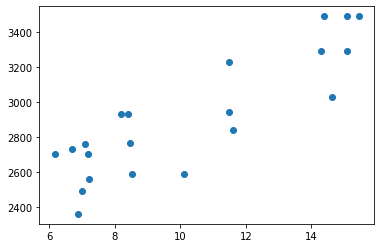

In [218]:
plt.scatter(xinyuan_33.使用面积, xinyuan_33.简化价格)

In [219]:
lr.fit(xinyuan_33[['使用面积']], xinyuan_33[['简化价格']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
lr.score(xinyuan_33[['使用面积']], xinyuan_33[['简化价格']])

0.7522612348781197

In [221]:
lr.predict([[60],[70]])

array([[7351.80801822],
       [8243.92938022]])

In [222]:
lr.intercept_[0]

1999.0798461992576

In [223]:
lr.coef_[0][0]

89.21213620036009